murcko scaffold analysis

In [1]:
import csv
smiles_list = []
with open(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\all_initial.csv", 'r') as file:
    reader = csv.reader(file)
    next(reader) # 跳过标题行
    for row in reader:
        smiles = row[0] # 假设SMILES字符串在第一列
        smiles_list.append(smiles)

In [3]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter

def most_common_scaffolds(smiles_list):
    # 将SMILES字符串转换为分子对象
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    
    # 计算每个分子的Murcko骨架
    scaffolds = [MurckoScaffold.MurckoScaffoldSmiles(mol=mol) for mol in mols]
    
    # 统计出现频率最高的骨架
    count = Counter(scaffolds)
    most_common = count.most_common()
    
    return most_common

In [6]:
result = most_common_scaffolds(smiles_list)
with open(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\murcko summarize.csv", 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Scaffold', 'Count'])
    for scaffold, count in result:
        writer.writerow([scaffold, count])

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image
import io

N = 5 # 可视化前N个骨架
mols = [Chem.MolFromSmiles(scaffold) for scaffold, count in result[:N]]
img = Draw.MolsToGridImage(mols)

# 将图像转换为Pillow图像对象
with io.BytesIO() as img_bytes:
    img.save(img_bytes, format='PNG')
    pil_img = Image.open(io.BytesIO(img_bytes.getvalue()))

# 保存图像为TIFF文件
pil_img.save(r'F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\output.tiff')
#存出的图像空白，原因无从可知

In [11]:
from rdkit import Chem
N = 10 # 检查前N个骨架
for scaffold, count in result[:N]:
    mol = Chem.MolFromSmiles(scaffold)
    if mol is None:
        print(f'无法转换骨架：{scaffold}')

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw
smiles = 'c1ccccc1'
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)
img.show()

In [13]:
smiles = 'O=c1cc(-c2ccccc2)oc2ccccc12'
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)
img.show()

In [14]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles_list = ['c1ccccc1', 'O=c1cc(-c2ccccc2)oc2ccccc12', 'C1=C2CCCCC2C2CCC3CCCC3C2C1']
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
img = Draw.MolsToGridImage(mols)
img.save(r'F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\output.png')

In [17]:
import csv
smiles_list = []
with open(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\all_uni_processed.csv", 'r') as file:
    reader = csv.reader(file)
    next(reader) # 跳过标题行
    for row in reader:
        smiles = row[0] # 假设SMILES字符串在第一列
        smiles_list.append(smiles)
        
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter

def most_common_scaffolds(smiles_list):
    # 将SMILES字符串转换为分子对象
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    
    # 计算每个分子的Murcko骨架
    scaffolds = [MurckoScaffold.MurckoScaffoldSmiles(mol=mol) for mol in mols]
    
    # 统计出现频率最高的骨架
    count = Counter(scaffolds)
    most_common = count.most_common()
    
    return most_common


result = most_common_scaffolds(smiles_list)
with open(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\murcko_summarize_unique.csv", 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Scaffold', 'Count'])
    for scaffold, count in result:
        writer.writerow([scaffold, count])

clustering with murcko

In [7]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from sklearn.cluster import AgglomerativeClustering
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import DataStructs
import csv
# 定义化合物数据集
smiles_list = []
with open(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\all_uni_processed.csv", 'r') as file:
    reader = csv.reader(file)
    next(reader) # 跳过标题行
    for row in reader:
        smiles = row[0] # 假设SMILES字符串在第一列
        smiles_list.append(smiles)
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# 提取Murcko骨架并计算指纹
scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mols]
fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(scaffold, 2, nBits=1024) for scaffold in scaffolds]

In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,SpectralClustering
from sklearn import metrics
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler
from rdkit import Chem, DataStructs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#降维
tsne=TSNE(random_state=0,perplexity=30)
tsne.fit(fps)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30, random_state=0, verbose=0)

In [10]:
X = tsne.embedding_

#根据calinski公式判断最合适的类别数目
score = 0 
score_id = 0
best_y_pred = np.array([])
for i in range(2,16):
        y_pred = KMeans(n_clusters=i,random_state=0).fit_predict(X)
        if score < metrics.calinski_harabasz_score(X, y_pred):
            score = metrics.calinski_harabasz_score(X, y_pred)
            score_id = i
            best_y_pred = y_pred
print(score)
print(score_id)

10047.835795457757
14


In [11]:
Cluster = KMeans(n_clusters=14,random_state=0, max_iter=300).fit(X)
y_pred = Cluster.predict(X)
y_pred.tofile(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\kmeans_14.csv",sep='\n')
#输出中心化合物，便于后期分析

In [12]:
closest, _ = metrics.pairwise_distances_argmin_min(Cluster.cluster_centers_, X)
closest

array([1399, 2255, 5008,   21, 3133, 8308, 3215, 1428, 5586, 1787, 7470,
       5280,   89,  906], dtype=int64)

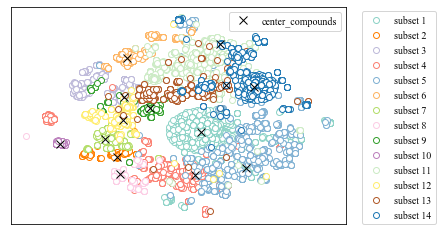

In [27]:
color = ['#8dd3c7','#ff7f00','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#33a02c','#bc80bd','#ccebc5','#ffed6f','#b15928','#1f78b4']
#marker = ['x','h','>','<','*','d','v','2','P']
plt.clf()
plt.rcParams['font.family'] = ['Times New Roman']# 设置字体
class_plot=[]
label_list=[]
for i in range(14):
    class_plot.append(plt.plot(X[:,0][np.where(y_pred==i)], X[:,1][np.where(y_pred==i)], 
                marker='o',c=color[i],markerfacecolor='w',markersize=6,linestyle='')[0])
    label_list.append('subset %d'%(i+1))
center_plot =plt.plot(X[closest][:,0],X[closest][:,1],marker='x',c='k',
                      linestyle='',markersize=8)
l1=plt.legend(center_plot,['center_compounds'],loc="best",ncol=1,fontsize='small')
plt.legend(class_plot,label_list,bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0,fontsize='small')
plt.gca().add_artist(l1,)
plt.xticks(())
plt.yticks(())
plt.savefig(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\kmeans_14_2D.tif", dpi=600, bbox_inches="tight")
plt.show()

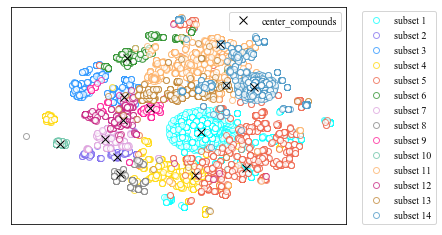

In [31]:
color = ['#00FFFF','#7B68EE','#1E90FF','gold','#EE5C42','ForestGreen','plum','grey','DeepPink','#66c2a5','#fdae61','#c51b7d','#bf812d','#4393c3']
plt.clf()
plt.rcParams['font.family'] = ['Times New Roman']# 设置字体
class_plot=[]
label_list=[]
for i in range(14):
    class_plot.append(plt.plot(X[:,0][np.where(y_pred==i)], X[:,1][np.where(y_pred==i)], 
                marker='o',c=color[i],alpha=0.7,markerfacecolor='w',markersize=6,linestyle='')[0])
    label_list.append('subset %d'%(i+1))
center_plot =plt.plot(X[closest][:,0],X[closest][:,1],marker='x',c='k',
                      linestyle='',markersize=8)
l1=plt.legend(center_plot,['center_compounds'],loc="best",ncol=1,fontsize='small')
plt.legend(class_plot,label_list,bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0,fontsize='small')
plt.gca().add_artist(l1,)
plt.xticks(())
plt.yticks(())
plt.savefig(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\kmeans_14_2D_2.tif", dpi=600, bbox_inches="tight")
plt.show()

In [35]:
from rdkit import Chem
from rdkit.Chem import Draw
import csv

smiles_list = []
with open(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\center_mol_14_tsne_2dimension.csv", 'r') as file:
    reader = csv.reader(file)
    next(reader) # 跳过标题行
    for row in reader:
        smiles = row[0] # 假设SMILES字符串在第一列
        smiles_list.append(smiles)
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
img = Draw.MolsToGridImage(mols)
img.show()
img.save(r'F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\output.png')

降3维

In [17]:
clf_T = TSNE(n_components=3,random_state=0)
loc_XYZ = clf_T.fit_transform(fps)

In [19]:
clfK = KMeans(n_clusters=14,random_state=0,max_iter=300)
y_pred = clfK.fit_predict(fps)
# 统计数据集中每种分类的个数
for i in set(y_pred):
    print("{:3d} : {}".format(i,sum(y_pred==i)))
closest = metrics.pairwise_distances_argmin(clfK.cluster_centers_,fps)

  0 : 2373
  1 : 164
  2 : 529
  3 : 720
  4 : 1003
  5 : 432
  6 : 299
  7 : 283
  8 : 179
  9 : 79
 10 : 967
 11 : 320
 12 : 386
 13 : 1160


In [20]:
y_pred.tofile(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\order_14_tsne_dimension.csv",sep='\n')
closest.tofile(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\center_14_tsne_dimension.csv",sep='\n')

<Figure size 432x288 with 0 Axes>

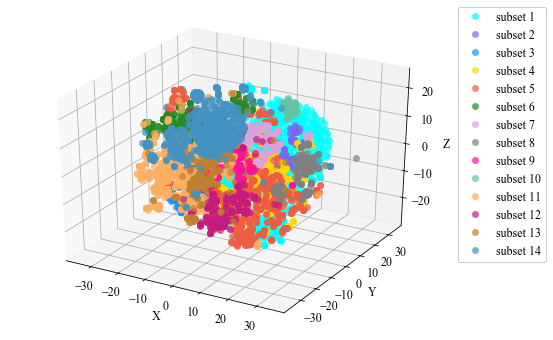

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [21]:
color = ['#00FFFF','#7B68EE','#1E90FF','gold','#EE5C42','ForestGreen','plum','grey','DeepPink','#66c2a5','#fdae61','#c51b7d','#bf812d','#4393c3']
#marker = ['o','<','^','s','*','p']
plt.clf()
plt.rcParams['font.family'] = ['Times New Roman']# 设置字体
plt.rcParams['font.size'] = 12# 设置字号
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for i in set(y_pred):
    ax.plot(loc_XYZ[y_pred==i,0], loc_XYZ[y_pred==i,1],loc_XYZ[y_pred==i,2],'o',
           markersize=7,c=color[i],alpha=0.7,label='subset %d'%(i+1),markeredgewidth=0)
plt.legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad= 0,framealpha=1)
#ax.view_init(elev=5,azim=None)
#ax.view_init(elev=10,azim=1020)#77
ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
#plt.savefig("C:/Users/TYJ/Desktop/academic/HIV_RT/6_cluster/cluster_8.tif", dpi=300,bbox_inches="tight")
plt.show()
plt.plot

kmeans for 12 class

In [1]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from sklearn.cluster import AgglomerativeClustering
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import DataStructs
import csv
# 定义化合物数据集
smiles_list = []
with open(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\all_uni_processed.csv", 'r') as file:
    reader = csv.reader(file)
    next(reader) # 跳过标题行
    for row in reader:
        smiles = row[0] # 假设SMILES字符串在第一列
        smiles_list.append(smiles)
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# 提取Murcko骨架并计算指纹
scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mols]
fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(scaffold, 2, nBits=1024) for scaffold in scaffolds]

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,SpectralClustering
from sklearn import metrics
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler
from rdkit import Chem, DataStructs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#降维
tsne=TSNE(random_state=0,perplexity=30)
tsne.fit(fps)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30, random_state=0, verbose=0)

In [3]:
X = tsne.embedding_

#根据calinski公式判断最合适的类别数目
score = 0 
score_id = 0
best_y_pred = np.array([])
for i in range(2,13):
        y_pred = KMeans(n_clusters=i,random_state=0).fit_predict(X)
        if score < metrics.calinski_harabasz_score(X, y_pred):
            score = metrics.calinski_harabasz_score(X, y_pred)
            score_id = i
            best_y_pred = y_pred
print(score)
print(score_id)

9663.750638799445
12


In [5]:
Cluster = KMeans(n_clusters=11,random_state=0, max_iter=300).fit(X)
y_pred = Cluster.predict(X)
y_pred.tofile(r"F:\Medicinal and Edible Herbs\medical_edible_VS\initial_data_process\murcko scaffold\12 cluster\kmeans_11.csv",sep='\n')
#输出中心化合物，便于后期分析